# Sploosh: onomatopoeia of a mass falling into liquid




## Definition of the model

### Imports and definitions

In [1]:
import os
import sys
import math
sys.path.insert(1, "../..")
import numpy as np
import matplotlib.pyplot as plt

import spatialpy

### Model

In [31]:
class Sploosh(spatialpy.Model):
    WALLS = 1
    WATER = 2
    ROCK  = 3

    def __init__(self, model_name="Sploosh"):
        spatialpy.Model.__init__(self, model_name)
        
        # Domain       
        xmax=1
        ymax=1
        delta_wall  = 0.01
        delta_water = 0.05
        delta_rock  = 0.01
        # Constants
        wall_mass=0.0000001
        wall_nu=1.0
        wall_vol=1.0
        water_mass=0.0000001
        water_nu=1.0
        water_vol=1.0
        rock_size=0.1
        rock_mass=10
        rock_nu=10
        rock_vol=1.0
        ############### start with and empty Domain
        domain = spatialpy.Domain(0, xlim=(0,xmax), ylim=(0,ymax), zlim=(0,0), gravity=[0,-1,0])
        #domain = spatialpy.Domain(0, xlim=(0,xmax), ylim=(0,ymax), zlim=(0,0))
        domain.dimensions = 2
        ############### add Walls
#         y=0 # bottom
#         for x_ndx,x in enumerate(np.arange(start=0, stop=xmax, step=delta_wall)):
#             domain.add_point([x,y,0], type=self.WALLS, mass=wall_mass, vol=wall_vol, nu=wall_nu, fixed=True)
#         x=0 # left side
#         for y_ndx,y in enumerate(np.arange(start=delta_wall, stop=ymax, step=delta_wall)):
#             domain.add_point([x,y,0], type=self.WALLS, mass=wall_mass, vol=wall_vol, nu=wall_nu, fixed=True)
#         x=xmax # right side
#         for y_ndx,y in enumerate(np.arange(start=delta_wall, stop=ymax, step=delta_wall)):
#             domain.add_point([x,y,0], type=self.WALLS, mass=wall_mass, vol=wall_vol, nu=wall_nu, fixed=True)
        ############### add Water
        for x_ndx,x in enumerate(np.arange(start=2*delta_water, stop=xmax-delta_water, step=delta_water)):
            for y_ndx,y in enumerate(np.arange(start=2*delta_water, stop=ymax/2, step=delta_water)):
                domain.add_point([x,y,0], type=self.WATER, mass=water_mass, vol=water_vol, nu=water_nu, fixed=False)
        ############### add a "Rock"
#         for x_ndx,x in enumerate(np.arange(start=(xmax/2)-(rock_size/2), stop=(xmax/2)+(rock_size/2), step=delta_rock)):
#             for y_ndx,y in enumerate(np.arange(start=(ymax-rock_size), stop=ymax, step=delta_rock)):
#                 domain.add_point([x,y,0], type=self.ROCK, mass=rock_mass, vol=1.0, nu=rock_nu, fixed=False)

        self.add_domain(domain)
        
        # Static Domain
        self.staticDomain = False
        
        # Timespan
        dt = 1e-8
        nt = 10
        self.timespan(np.linspace(0, dt*nt, 5), timestep_size=dt)
       

In [24]:
model = Sploosh()
#model.domain

In [25]:
model.domain.P0 = 0.000

In [26]:
solver = spatialpy.Solver(model=model, debug_level=0)
%time solver.compile()
solver.build_dir

CPU times: user 114 ms, sys: 3.91 ms, total: 118 ms
Wall time: 1.02 s


'/tmp/spatialpy_build_ffcfb3hw'

In [27]:
%time results = solver.run()

pairwiseForce(id=324) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=54) F=[5.241300e-311 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=0) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=108) F=[4.951929e-311 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=1) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=109) F=[5.485436e-311 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=378) F=[-2.646087e-310 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=110) F=[5.241300e-311 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=162) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]


pairwiseForce(id=100) F=[-8.269510e-289 -1.131273e+20 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=214) F=[-4.208989e-291 -4.519646e+17 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=41) F=[-3.250570e-287 -3.175317e+21 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=101) F=[-5.664697e-289 -7.792501e+19 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=215) F=[-4.575877e-291 -4.810563e+17 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=319) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=320) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=321) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=322) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.0000

pairwiseForce(id=166) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=331) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=379) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=58) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=272) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=332) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=4) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=273) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pairwiseForce(id=112) F=[0.000000e+00 -1.000000e+00 0.000000e+00] Fbp=[0.000000e+00 0.000000e+00 0.000000e+00]
pair

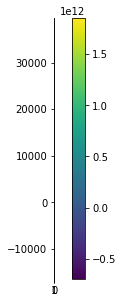

In [28]:
results.plot_property("v", p_ndx=1, t_ndx=-1, use_matplotlib=True)

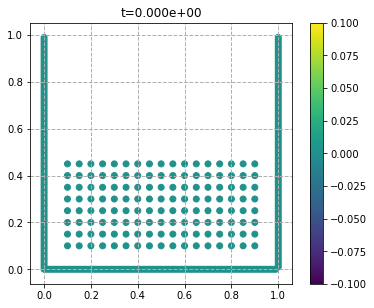

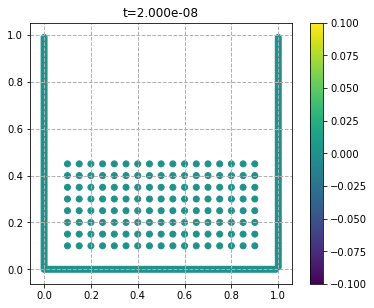

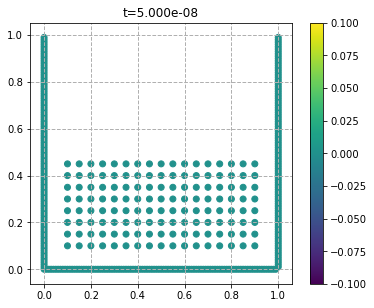

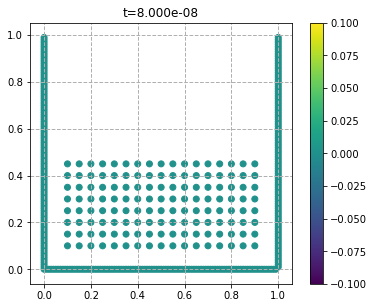

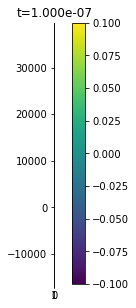

In [29]:
for n,t in enumerate(results.get_timespan()):
    results.plot_property("v",t_ndx=n,use_matplotlib=True)
    plt.title(f"t={t:.3e}")

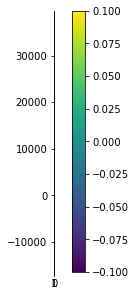

In [30]:
results.plot_property("mass", p_ndx=1, t_ndx=-1, use_matplotlib=True)

In [9]:
#results.plot_property("v", p_ndx=1, t_ndx=-1, use_matplotlib=False)

In [10]:
#results.plot_property("type", use_matplotlib=True)